# Analyzing kununu concatenated rating texts
-------------------

> <i>Description: In this notebook, we research if there are any significant patterns or insights in kununu concatenated rating texts.</i>

We use average score for the category to define sentiment. If the score is less than or equal to 3, we say that sentiment is negative, if the score is more than 3, we say that sentiment is positive. This data is only present for some of the kununu reviews.

Input Files: 
1) text_data_classes_sentiment.xlsx

Output:
1) kununu concatenated rating texts.xlsx

In [11]:
import pandas as pd
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt

* text_data_classes_sentiment.xlsx is a result of text classification and sentiment determination. 

In [7]:
df = pd.read_excel('text_data_classes_sentiment.xlsx')
# To filter out non-classifyed or empty observations for concatenated_ratings_class
df = df[df['concatenated_ratings_class'].notna() & (df['concatenated_ratings_class'] != '')]
# To see how many observations are there for each type of country
print(df['country'].value_counts())

country
Germany    201
Unknown      3
Name: count, dtype: int64


In [45]:
# Since Germany is 201 observations out of 204, we filter df to include only Germany 
df = df[df['country'] == 'Germany']

department
Corporate    109
Retail        26
Logistics     13
Name: count, dtype: int64

## Visualization

In [8]:
category_map = ["Diversity & Equity & Inclusion", "Authenticity", "Collaboration & Teamwork & Social Culture", 
                "Creativity and Innovation", "Professional Development and Continuous Learning", "Youthful Spirit", 
                "Digital Transformation & Process Management", "Leadership & Communication", "Fashion and Lifestyle Benefits", 
                "Health and Well-being", "Work-Life Balance & Flexibility", "Mobility & Accessibility", 
                "Financial Compensation & Benefits", "Device Leasing and Corporate Benefits", "Social and Recreational Benefits"]

In [19]:
def plot_category_distribution(df, category_column='suggestion_class', department_column=None, position_column=None, department=None, position=None, category_map=None, figsize=(10, 6)):
    """
    Plots the distribution of categories and their percentages from a specified column in a DataFrame,
    with optional filtering by department and position.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the category data.
    - category_column (str): The column in the DataFrame with comma-separated category values. Defaults to 'suggestion_class'.
    - department_column (str): The column in the DataFrame indicating department names. Default is None, meaning no filtering by department.
    - position_column (str): The column in the DataFrame indicating position names. Default is None, meaning no filtering by position.
    - department (str or list): Specific department(s) to include. If None, includes all departments.
    - position (str or list): Specific position(s) to include. If None, includes all positions.
    - category_map (dict): An optional dictionary to filter categories based on specific mapping. Only categories present in this map will be plotted.
    - figsize (tuple): The size of the plot in inches, provided as (width, height). Defaults to (10, 6).

    """
    # Apply department filtering if specified
    if department_column and department:
        if isinstance(department, list):
            df = df[df[department_column].isin(department)]
        else:
            df = df[df[department_column] == department]

    # Apply position filtering if specified
    if position_column and position:
        if isinstance(position, list):
            df = df[df[position_column].isin(position)]
        else:
            df = df[df[position_column] == position]
    
    # Split the category column entries into individual categories and count their frequencies
    categories = df[category_column].dropna().str.split(', ').sum()
    category_counts = Counter(categories)
    
    # Filter categories based on the provided category_map, if any
    if category_map:
        filtered_category_counts = {category: count for category, count in category_counts.items() if category in category_map}
    else:
        filtered_category_counts = category_counts

    # Sort category counts in ascending order
    sorted_category_counts = dict(sorted(filtered_category_counts.items(), key=lambda item: item[1], reverse=False))

    # Calculate the percentage each category contributes to the total number of mentions
    total_mentions = sum(sorted_category_counts.values())
    percentages = [(count / total_mentions) * 100 for count in sorted_category_counts.values()]

    # Plotting the sorted frequencies with percentages
    plt.figure(figsize=figsize)
    plt.barh(list(sorted_category_counts.keys()), list(sorted_category_counts.values()), color='teal')

    # Add percentage text next to the bars
    for index, (count, percentage) in enumerate(zip(sorted_category_counts.values(), percentages)):
        plt.text(count, index, f'{percentage:.2f}%', va='center')

    plt.xlabel('Total Number of Mentions')
    plt.ylabel('Core Values & Benefits')
    plt.title('Frequency of Core Values & Benefits with Percentage of Total Mentions')
    plt.tight_layout()
    plt.show()

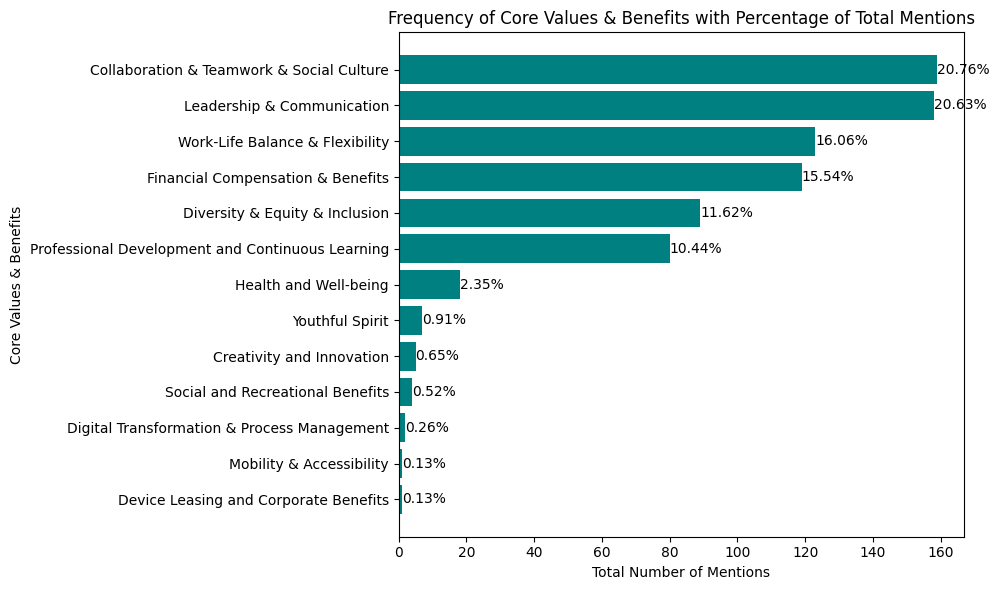

In [20]:
plot_category_distribution(
    df=df, 
    category_column='concatenated_ratings_class', 
    department_column='department', 
    position_column='position', 
    department=None,  # None includes all departments
    position=None,    # None includes all positions
    category_map=category_map, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

In [14]:
def plot_department_position_distribution(df, category_column='summary_class', department_column='department', position_column='position', min_reviews=20, figsize=(15, 10)):
    """
    Plots the distribution of non-empty category entries by department and position.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing department and position data.
    - category_column (str): The column to filter non-empty entries. Defaults to 'summary_class'.
    - department_column (str): The column indicating department names. Defaults to 'department'.
    - position_column (str): The column indicating position names. Defaults to 'position'.
    - min_reviews (int): The minimum number of reviews required to include a department-position group. Defaults to 50.
    - figsize (tuple): The size of the plot in inches, provided as (width, height). Defaults to (15, 10).

    """
    # Filter data to exclude rows with empty category entries
    filtered_df = df[df[category_column].notna() & (df[category_column] != '')]

    # Group by department and position, then filter to keep rows with more than the minimum number of reviews
    department_position_counts = filtered_df.groupby([department_column, position_column]).size().reset_index(name='count')
    department_position_counts = department_position_counts[department_position_counts['count'] > min_reviews]

    # Get unique departments for plotting
    departments = department_position_counts[department_column].unique()

    # Set up a 2x2 plot layout or adjust based on the number of departments
    n_plots = min(4, len(departments))  # Change to fit all departments as needed
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()

    # Loop through departments and create a bar chart for each
    for i, department in enumerate(departments[:n_plots]):
        subset = department_position_counts[department_position_counts[department_column] == department]
        axes[i].bar(subset[position_column], subset['count'], color='teal')
        axes[i].set_title(f'{department} - Distribution by Position')
        axes[i].set_xlabel('Position')
        axes[i].set_ylabel('Number of Non-Empty Rows')

    # Adjust layout
    plt.tight_layout()
    plt.show()


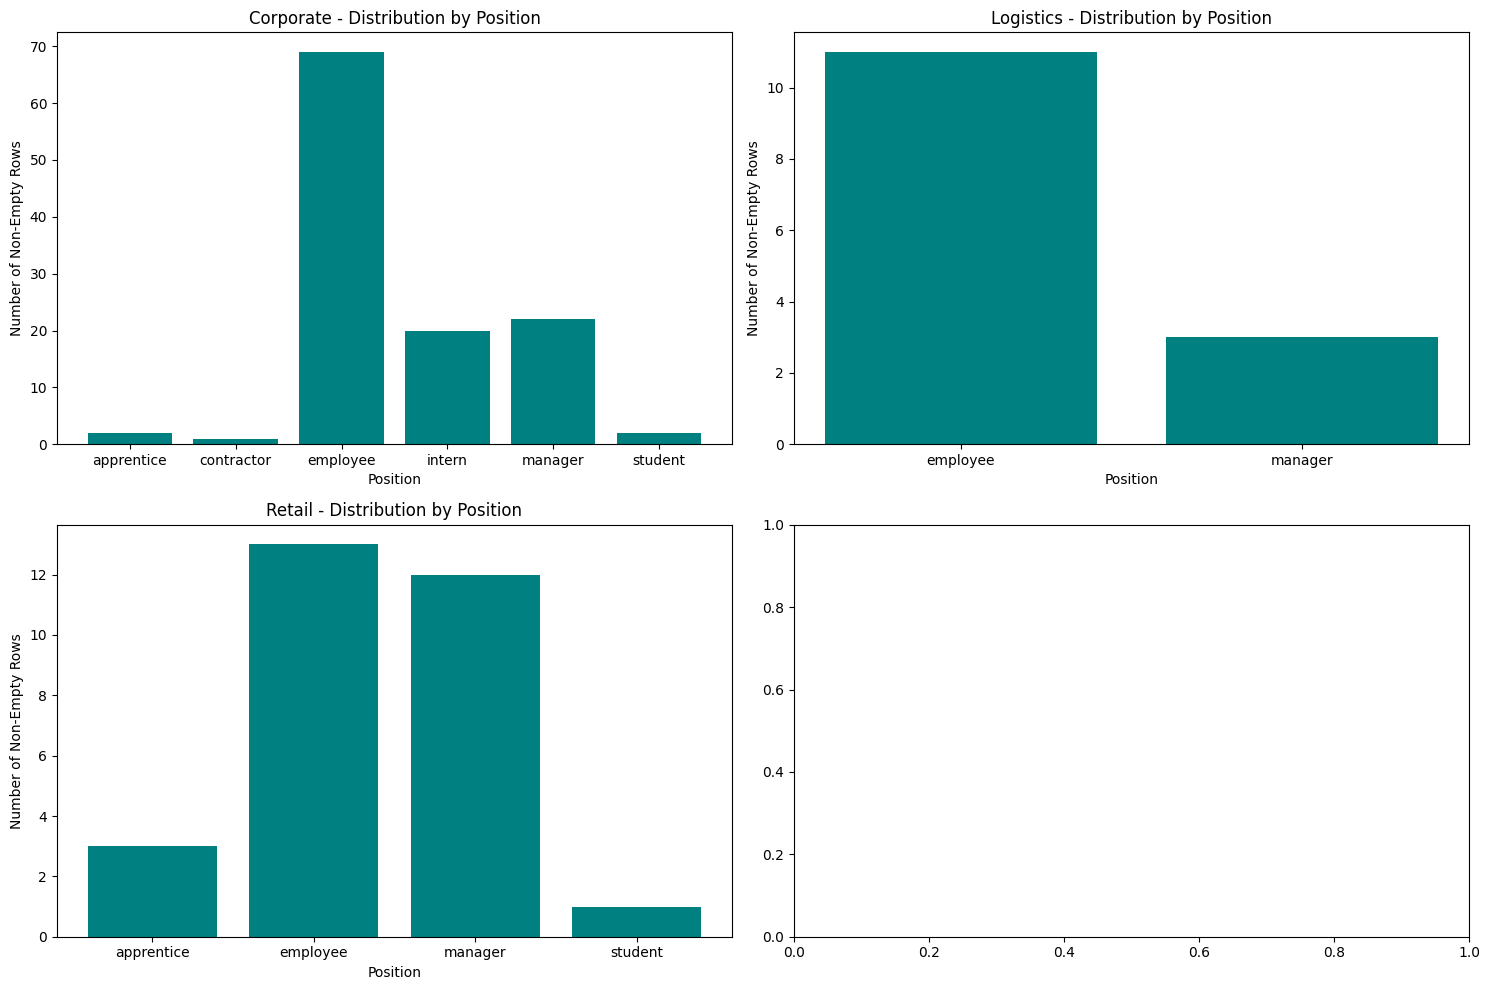

In [16]:
plot_department_position_distribution(df, category_column='concatenated_ratings_class', department_column='department', position_column='position', min_reviews=0, figsize=(15, 10))

* Since there are not so many reviews, there is no reason to lok at the departments separately. We will only research employees for all departments and managers for all departments. 

* We need a function to get positive and negative mentions:

In [25]:
import re

def filter_classes_by_score(df, class_column='concatenated_ratings_class', score_column='kununu_ratings_class_avg', threshold=3, comparison='greater'):
    """
    Filters the class column in the DataFrame based on a score threshold in the corresponding score column.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the class and score columns.
    - class_column (str): The name of the column containing comma-separated class names. Defaults to 'concatenated_ratings_class'.
    - score_column (str): The name of the column containing comma-separated scores prefixed by category names. Defaults to 'kununu_ratings_class_avg'.
    - threshold (float): The score threshold for filtering. Defaults to 3.
    - comparison (str): The comparison operator for filtering ('greater', 'greater_equal', 'less', 'less_equal').

    Returns:
    - pandas.DataFrame: A filtered DataFrame with a new column 'filtered_classes' containing the classes that meet the criteria.
    """
    def filter_classes(row):
        # Split classes
        classes = row[class_column].split(', ')
        
        # Extract scores from score_column, assuming format "CategoryName Score"
        score_entries = row[score_column].split(', ')
        scores = [float(re.search(r'\d+\.?\d*', entry).group()) for entry in score_entries if re.search(r'\d+\.?\d*', entry)]
        
        if comparison == 'greater':
            filtered_classes = [cls for cls, score in zip(classes, scores) if score > threshold]
        elif comparison == 'greater_equal':
            filtered_classes = [cls for cls, score in zip(classes, scores) if score >= threshold]
        elif comparison == 'less':
            filtered_classes = [cls for cls, score in zip(classes, scores) if score < threshold]
        elif comparison == 'less_equal':
            filtered_classes = [cls for cls, score in zip(classes, scores) if score <= threshold]
        else:
            raise ValueError("Comparison must be 'greater', 'greater_equal', 'less', or 'less_equal'")
        
        return ', '.join(filtered_classes) if filtered_classes else None

    df['filtered_classes'] = df.apply(filter_classes, axis=1)
    return df[df['filtered_classes'].notna()]

In [26]:
# For positive classes (score > 3)
df_positive = filter_classes_by_score(df, threshold=3, comparison='greater')

# For negative classes (score <= 3)
df_negative = filter_classes_by_score(df, threshold=3, comparison='less_equal')

### Results for employees

#### Positive sentiment

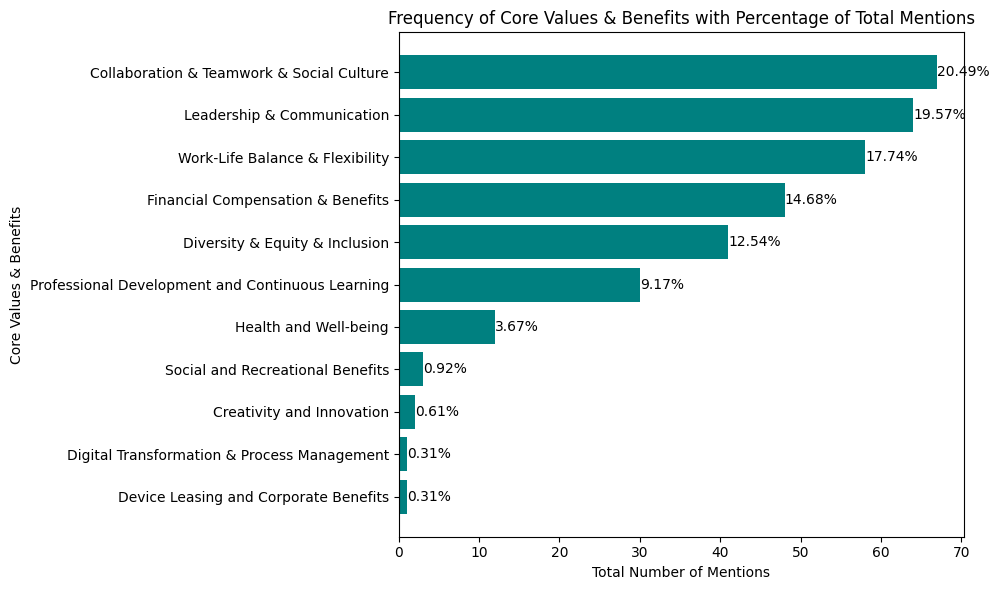

In [27]:
plot_category_distribution(
    df=df_positive, 
    category_column='concatenated_ratings_class', 
    department_column='department', 
    position_column='position', 
    department=None,  # None includes all departments
    position='employee',    # None includes all positions
    category_map=category_map, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

#### Negative sentiment

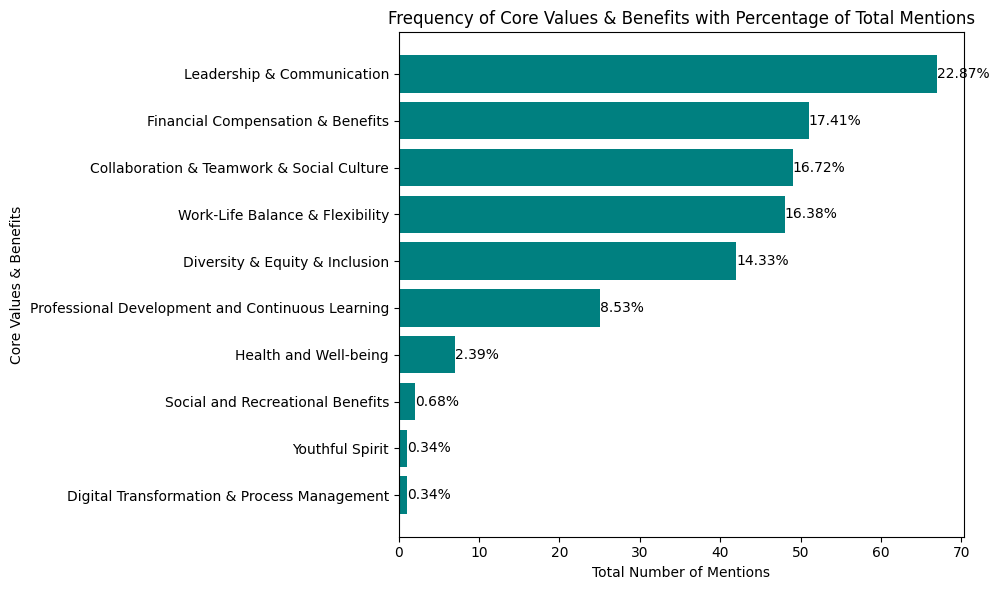

In [28]:
plot_category_distribution(
    df=df_negative, 
    category_column='concatenated_ratings_class', 
    department_column='department', 
    position_column='position', 
    department=None,  # None includes all departments
    position='employee',    # None includes all positions
    category_map=category_map, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

### Results for managers

#### Positive sentiment

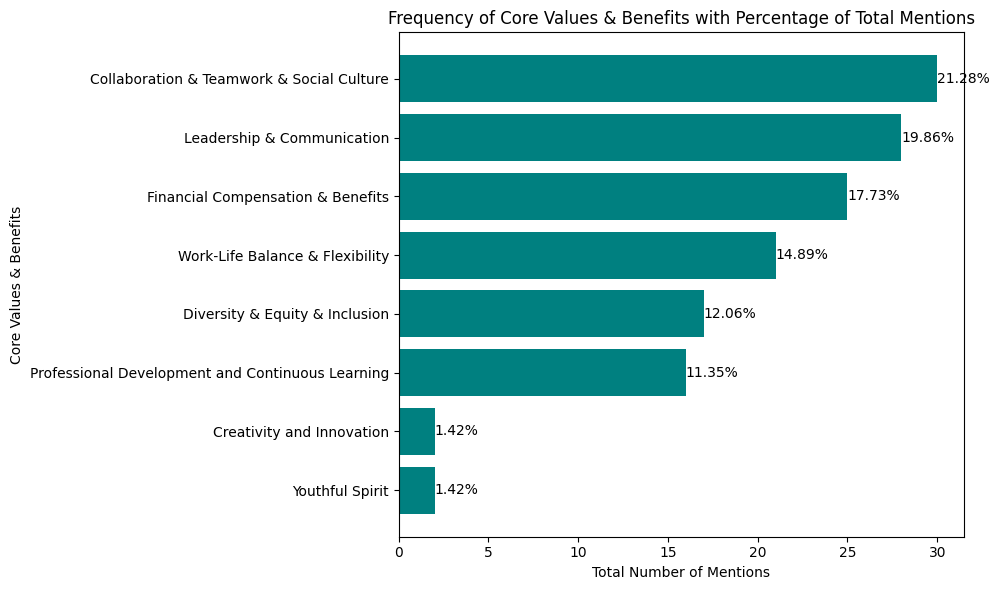

In [29]:
plot_category_distribution(
    df=df_positive, 
    category_column='concatenated_ratings_class', 
    department_column='department', 
    position_column='position', 
    department=None,  # None includes all departments
    position='manager',    # None includes all positions
    category_map=category_map, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

#### Negative sentiment

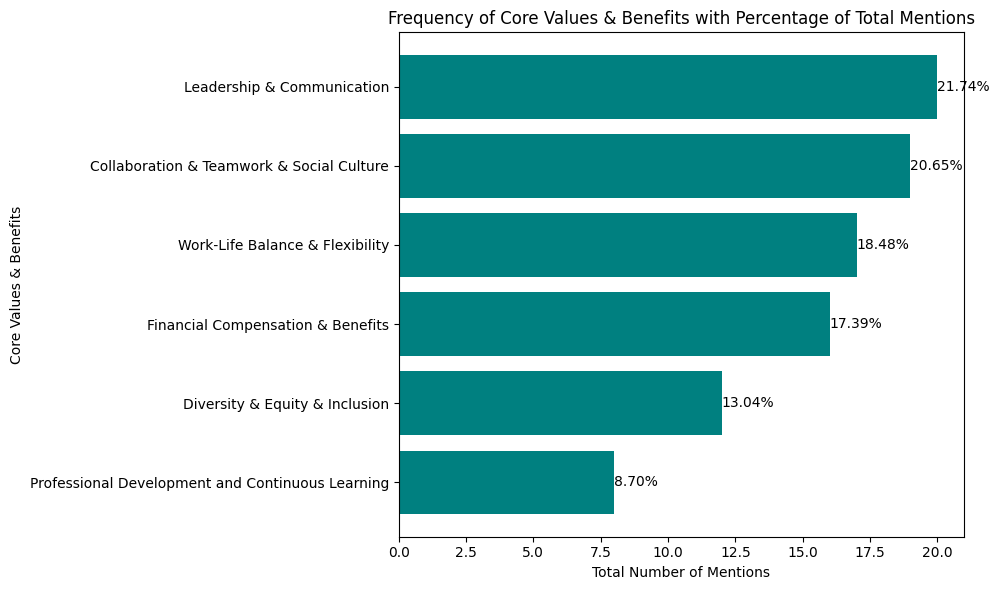

In [30]:
plot_category_distribution(
    df=df_negative, 
    category_column='concatenated_ratings_class', 
    department_column='department', 
    position_column='position', 
    department=None,  # None includes all departments
    position='manager',    # None includes all positions
    category_map=category_map, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

In [31]:
# Saving new dataframe for concatenated rating in to excel file 
df.to_excel('kununu_concatenated_rating_text.xlsx')

### End of the notebook